In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os
from skimage import color
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.models import Sequential
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
import random

2024-04-25 10:18:46.411657: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-25 10:18:46.411768: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-25 10:18:46.566470: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Data

Loading data

In [3]:
ab = np.load('/kaggle/input/portret-dataset/ab_256_5000.npy')
L = np.load('/kaggle/input/portret-dataset/L_256_5000.npy')

Splitting data into train and test data

In [11]:
L_train, L_test, ab_train, ab_test = train_test_split(L, ab, test_size=0.2, random_state=54)

In [12]:
print("Train:", len(L_train))
print("Test: ", len(L_test))

Train: 4000
Test:  1000


In [13]:
X = L_train
y = ab_train / 128

# Model1

In [15]:
model1 = Sequential()
model1.add(InputLayer(input_shape=(256, 256, 1)))
model1.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model1.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model1.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model1.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model1.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model1.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(UpSampling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model1.add(UpSampling2D((2, 2)))
model1.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model1.add(UpSampling2D((2, 2)))
model1.add(Conv2D(2, (3, 3), activation='relu', padding='same'))
model1.compile(optimizer='rmsprop',loss='mse')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [16]:
model1.fit(x=X,
    y=y,
    batch_size=6,
    epochs=30)

Epoch 1/30
  8/667 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 0.0500  

I0000 00:00:1714040439.068510      86 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


667/667 ━━━━━━━━━━━━━━━━━━━━ 30s 23ms/step - loss: 0.0128
Epoch 2/30
667/667 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0078
Epoch 3/30
667/667 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0077
Epoch 4/30
667/667 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0074
Epoch 5/30
667/667 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0074
Epoch 6/30
667/667 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0071
Epoch 7/30
667/667 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0069
Epoch 8/30
667/667 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0072
Epoch 9/30
667/667 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0069
Epoch 10/30
667/667 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0071
Epoch 11/30
667/667 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0068
Epoch 12/30
667/667 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0069
Epoch 13/30
667/667 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0069
Epoch 14/30
667/667 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0067
Epoch 15/30
667/667 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step

# Model2

In [18]:
model2 = Sequential()
model2.add(InputLayer(input_shape=(256, 256, 1)))
model2.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model2.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(UpSampling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model2.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model2.add(UpSampling2D((2, 2)))
model2.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model2.add(UpSampling2D((2, 2)))
model2.add(Conv2D(2, (3, 3), activation='relu', padding='same'))
model2.compile(optimizer='sgd', loss='mse')

In [20]:
model2.fit(x=X,
    y=y,
    batch_size=20,
    epochs=30)


Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 24s 41ms/step - loss: 0.0121
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0096
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0094
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0093
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0090
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0090
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0089
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0091
Epoch 9/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0088
Epoch 10/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0089
Epoch 11/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0089
Epoch 12/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0089
Epoch 13/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0089
Epoch 14/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0086
Epoch 15/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 8

# Model3

In [21]:
model3 = Sequential()
model3.add(InputLayer(input_shape=(256, 256, 1)))
model3.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model3.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model3.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model3.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(UpSampling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model3.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model3.add(UpSampling2D((2, 2)))
model3.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model3.add(UpSampling2D((2, 2)))
model3.add(Conv2D(2, (3, 3), activation='relu', padding='same'))

model3.compile(optimizer='adam', loss='mean_squared_logarithmic_error')

In [22]:
model3.fit(x=X,
    y=y,
    batch_size=10,
    epochs=50)

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - loss: 0.0052
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0039
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0039
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0037
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.0035
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.0035
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.0036
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - loss: 0.0035
Epoch 9/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.0036
Epoch 10/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.0034
Epoch 11/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.0035
Epoch 12/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.0035
Epoch 13/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - loss: 0.0035
Epoch 14/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 0.0035
Epoch 15/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 

# Results

In [28]:
output1 = model1.predict(L_test)
output2 = model2.predict(L_test)
output3 = model3.predict(L_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [29]:
Lab_pred_1 = np.concatenate((L_test, output1 * 128 ), axis=-1)
RGB_pred_1 = color.lab2rgb(Lab_pred_1)

Lab_pred_2 = np.concatenate((L_test, output2 * 128 ), axis=-1)
RGB_pred_2 = color.lab2rgb(Lab_pred_2)

Lab_pred_3 = np.concatenate((L_test, output3 * 128 ), axis=-1)
RGB_pred_3 = color.lab2rgb(Lab_pred_3)

Lab = np.concatenate((L_test, ab_test), axis=-1)
RGB = color.lab2rgb(Lab)

/tmp/ipykernel_34/2768944138.py:8: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 16 negative Z values that have been clipped to zero
  RGB_pred_3 = color.lab2rgb(Lab_pred_3)


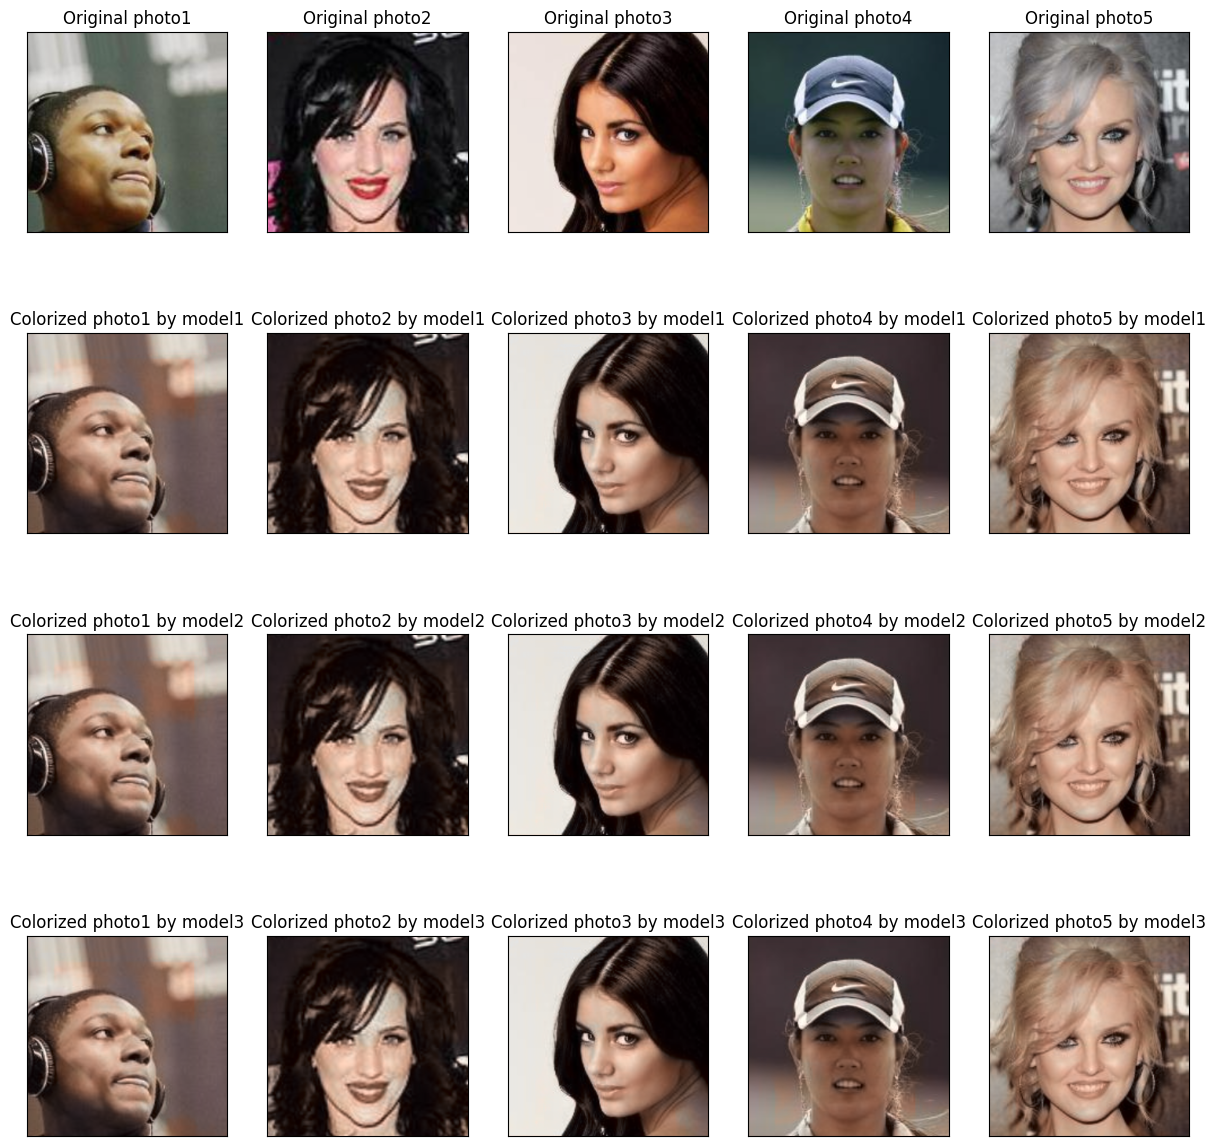

In [37]:
shift_image = 5
plt.figure(figsize=(15, 15))
for i in range(5):
    plt.subplot(4, 5, i + 1)
    plt.imshow(RGB[i + shift_image])
    # plt.axis('off')
    plt.title('Original photo{}'.format(i+1))
    plt.xticks([])
    plt.yticks([])

    plt.subplot(4, 5, i + 5 +1)
    plt.imshow(RGB_pred_1[i + shift_image])
    plt.title('Colorized photo{} by model1'.format(i+1))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(4, 5, i + 10 +1)
    plt.imshow(RGB_pred_1[i + shift_image])
    plt.title('Colorized photo{} by model2'.format(i+1))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(4, 5, i + 15 +1)
    plt.imshow(RGB_pred_1[i + shift_image])
    plt.title('Colorized photo{} by model3'.format(i+1))
    plt.xticks([])
    plt.yticks([])
plt.show()

As we can see, this model does not colorize the photo very effectively